In [2]:
import matplotlib.pyplot as plt
import numpy as np

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


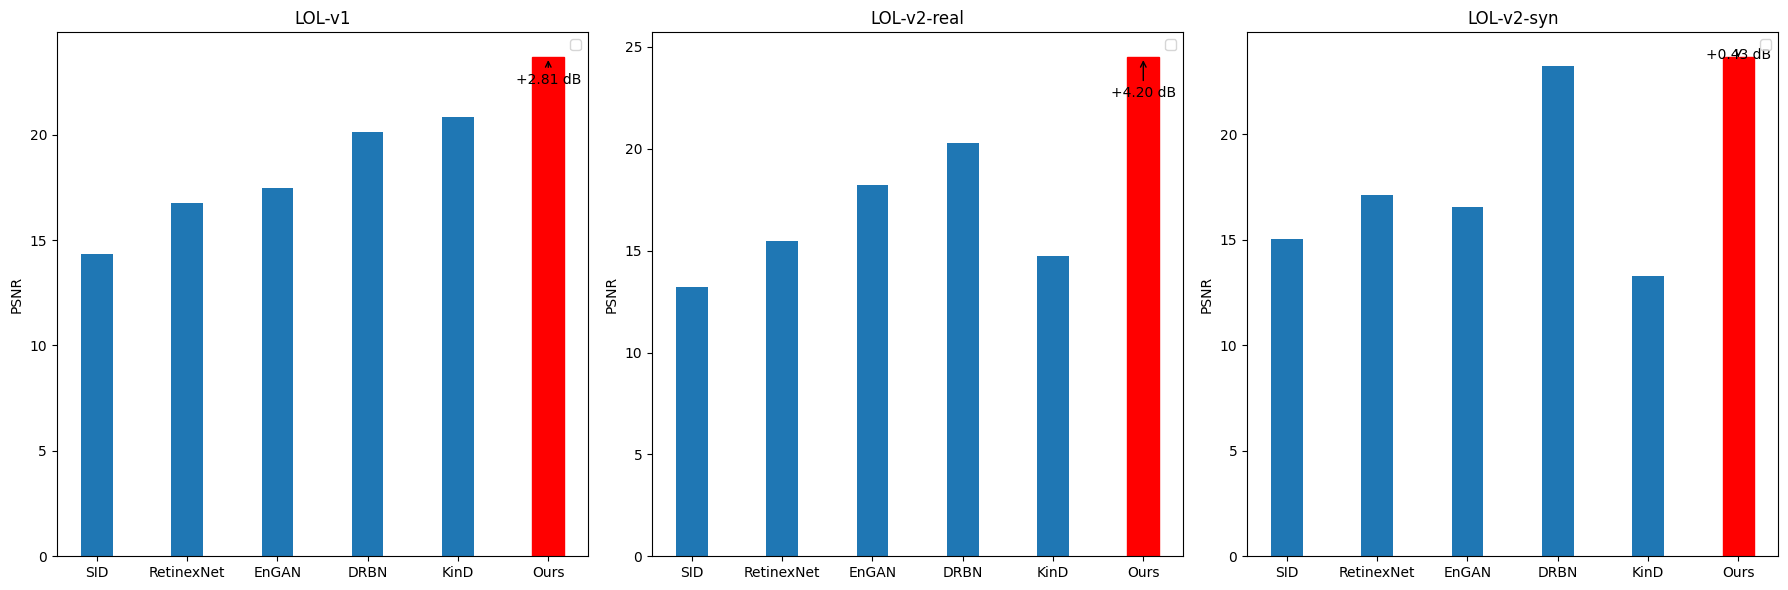

In [11]:
methods = ['SID', 'RetinexNet', 'EnGAN', 'DRBN', 'KinD', 'Ours']
psnr_lol_v1 = [14.35, 16.77, 17.48, 20.13, 20.86, 23.67]  # Replace with actual PSNR values
psnr_lol_v2_real = [13.24, 15.47, 18.23, 20.29, 14.74, 24.49]  # Replace with actual PSNR values
psnr_lol_v2_syn = [15.04, 17.13, 16.57, 23.22, 13.29, 23.65]  # Replace with actual PSNR values

improvement_v1 = psnr_lol_v1[-1] - sorted(psnr_lol_v1)[-2]
improvement_v2_real = psnr_lol_v2_real[-1] - sorted(psnr_lol_v2_real)[-2]
improvement_v2_syn = psnr_lol_v2_syn[-1] - sorted(psnr_lol_v2_syn)[-2]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Function to create the bar chart with improvements
def create_chart(ax, psnr_values, dataset_name, improvement):
    ind = np.arange(len(methods))  # the x locations for the groups
    width = 0.35  # the width of the bars

    # Bar chart
    bars = ax.bar(ind, psnr_values, width)

    # Highlight 'Ours' bar
    bars[-1].set_color('r')

    # Text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('PSNR')
    ax.set_title(f'{dataset_name}')
    ax.set_xticks(ind)
    ax.set_xticklabels(methods)
    ax.legend()

    # Drawing the improvement arrow and annotation
    second_best = sorted(psnr_values)[-2]
    our_performance = psnr_values[-1]
    ax.annotate(f'+{improvement:.2f} dB',
                xy=(ind[-1], our_performance), xycoords='data',
                xytext=(ind[-1], second_best + improvement / 2), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                ha='center', va='bottom')

# Create the plots
create_chart(axs[0], psnr_lol_v1, 'LOL-v1', improvement_v1)
create_chart(axs[1], psnr_lol_v2_real, 'LOL-v2-real', improvement_v2_real)
create_chart(axs[2], psnr_lol_v2_syn, 'LOL-v2-syn', improvement_v2_syn)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

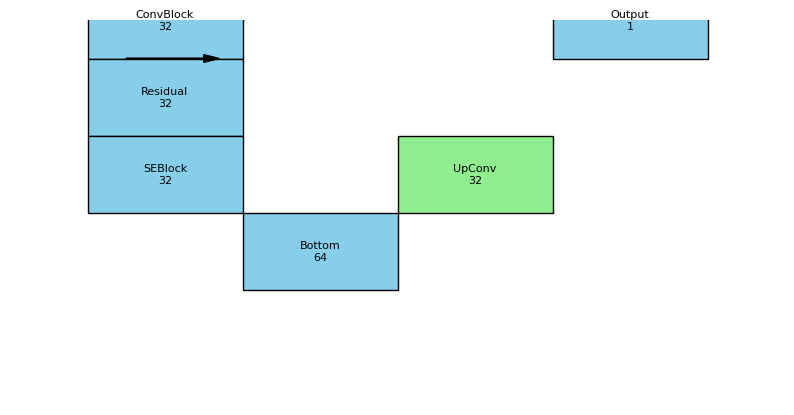

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to draw a block
def draw_block(ax, position, text, block_type):
    # Define colors and shapes for each block type
    if block_type == 'conv':
        color = 'skyblue'
    elif block_type == 'maxpool':
        color = 'lightcoral'
    elif block_type == 'upconv':
        color = 'lightgreen'
    else:
        color = 'lightgrey'
    
    # Draw the rectangle
    rect = patches.Rectangle(position, 0.2, 0.1, linewidth=1, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    plt.text(position[0]+0.1, position[1]+0.05, text, ha='center', va='center', fontsize=8)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.5)
plt.axis('off')

# Draw the encoder blocks
draw_block(ax, (0.1, 0.45), 'ConvBlock\n32', 'conv')
draw_block(ax, (0.1, 0.35), 'Residual\n32', 'conv')
draw_block(ax, (0.1, 0.25), 'SEBlock\n32', 'conv')

# Draw the bottom block
draw_block(ax, (0.3, 0.15), 'Bottom\n64', 'conv')

# Draw the upconv blocks
draw_block(ax, (0.5, 0.25), 'UpConv\n32', 'upconv')

# Draw the final output block
draw_block(ax, (0.7, 0.45), 'Output\n1', 'conv')

# Draw arrows or lines to connect the blocks to indicate data flow
plt.arrow(0.15, 0.45, 0.1, 0, head_width=0.01, head_length=0.02, fc='k', ec='k')
# (Add more arrows as necessary)

# Save the figure
plt.savefig('IlluminationEnhancerUNet.png', dpi=300)
plt.show()